#### Data Loading & Preprocessing


In [22]:
import pandas as pd

def load_and_preprocess_data(file_path):
    # Load data
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

    # Sort by date just in case
    df.sort_index(inplace=True)

    # Feature engineering
    df['MA_30'] = df['Close'].rolling(window=30).mean()
    df['MA_100'] = df['Close'].rolling(window=100).mean()
    df['Volatility_30'] = df['Close'].rolling(window=30).std()
    df['Daily Return'] = df['Close'].pct_change()

    # Drop rows with NaN values from rolling functions
    df.dropna(inplace=True)

    return df


#### Visualization Functions

In [23]:
import matplotlib.pyplot as plt

def plot_moving_averages(df):
    plt.figure(figsize=(14, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['MA_30'], label='30-Day MA')
    plt.plot(df['MA_100'], label='100-Day MA')
    plt.title('Close Price vs Moving Averages')
    plt.legend()
    plt.show()

def plot_volatility(df):
    plt.figure(figsize=(14, 4))
    plt.plot(df['Volatility_30'], label='30-Day Volatility', color='orange')
    plt.title('30-Day Rolling Volatility')
    plt.legend()
    plt.show()


#### Modeling Functions

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_model(df):
    features = ['MA_30', 'MA_100', 'Volatility_30', 'Daily Return']
    target = 'Close'

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return model, X_test, y_test, predictions, mse, r2


#### Evaluation Plot

In [25]:
def plot_predictions(y_test, predictions):
    plt.figure(figsize=(14, 6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, predictions, label='Predicted', linestyle='--')
    plt.title('Actual vs Predicted Close Prices')
    plt.legend()
    plt.show()


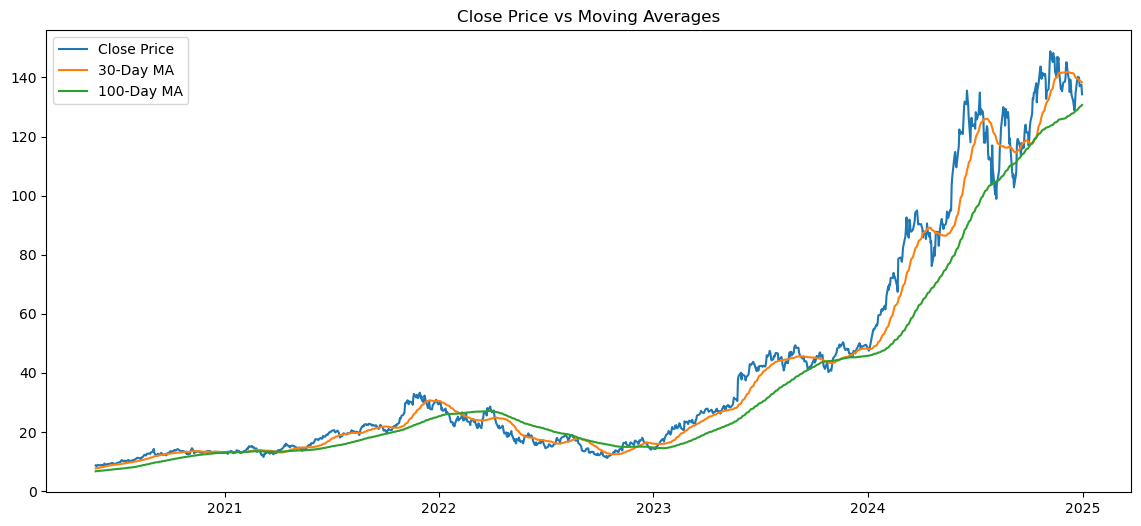

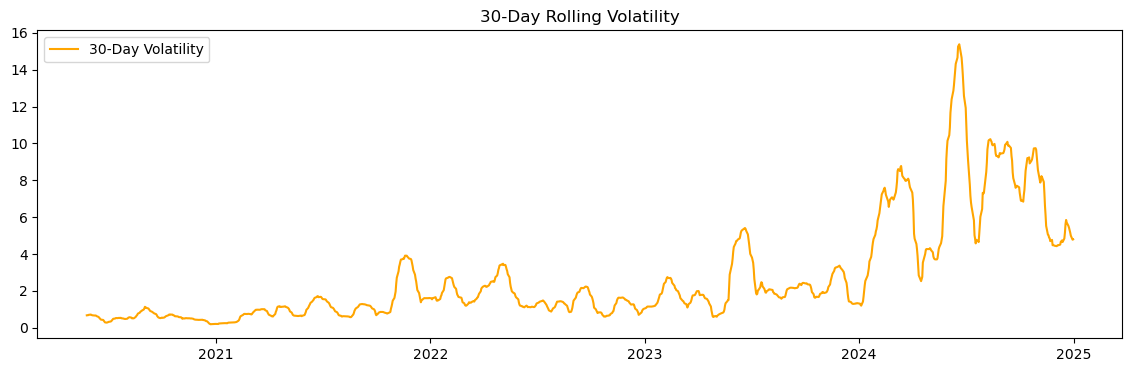

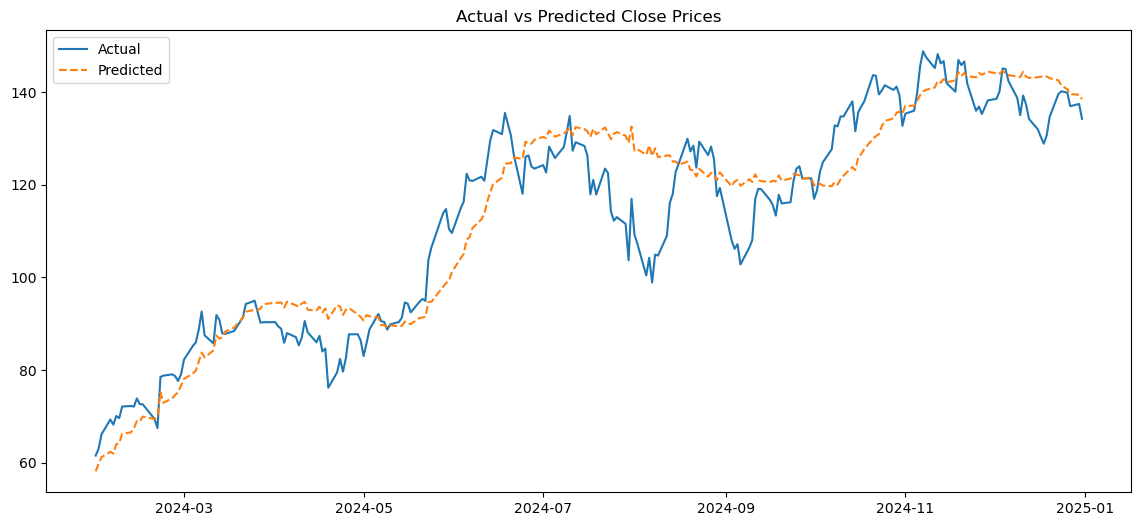

Mean Squared Error: 74.4674
R² Score: 0.8602


In [27]:
file_path = r"C:\Users\ual-laptop\Desktop\pro\Stock-Market-Analysis-INFO-511-\data\raw data\NVDA_stock_data.csv"

# Step 1
df = load_and_preprocess_data(file_path)

# Step 2
plot_moving_averages(df)
plot_volatility(df)

# Step 3
model, X_test, y_test, predictions, mse, r2 = train_model(df)

# Step 4
plot_predictions(y_test, predictions)

# Print metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')
